## Código para la transferencia de calor en una dimensión
Enrique Ramírez Hernández - Ciencias Atmosféricas

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
def conduccion_1d(k, S, L, TA, TB, N):
    
    """
    Parameters
    ----------
    L: float
    L es la longitud del dominio.
    
    k: float
    es la conductividad del material.
    
    S: float
    es la fuente.
    
    TA: float
    Es la condición de frontera a la izquierda.
    
    TB: float
    Es la condición de frontera a la derecha.
    
    N: int
    Es el número de nodos internos (grados de libertad). 
    
    Return
    ------
    al final esta función dibuja la solución.
    """
    

#    L = 5.0        Longitud del dominio
#    k = 0.02       Conductividad eleéctrica 
#    S = 1.0        Fuente
#    TA = 200       Temperatura lado izquierdo
#    TB = 1000      Temperatura derecho

#    N = 4
    h = L / (N+1)

    T = np.zeros(N+2)
    b = np.zeros(N)
    A = np.zeros((N,N))

    r = k / h**2
    b[:] = S / r
    T[0] = TA
    T[-1] = TB
    b[0] += TA
    b[-1] += TB

    b

    A[0,0] = 2
    A[0,1] = -1
    for i in range(1,N-1):
        A[i,i] = 2
        A[i,i+1] =-1
        A[i,i-1] =-1
    A[-1,-2] = -1
    A[-1,-1] = 2

    A

    T[1:N+1] = np.linalg.solve(A,b)

    plt.plot(T,'o-')
    plt.show()

#PROGRAMACIÓN SPAGUETTI


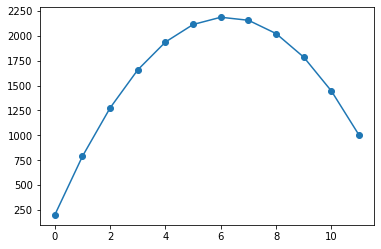

In [24]:
conduccion_1d(0.02, 10.0, 5.0, 200, 1000, 10)

In [5]:
import ipywidgets as widgets

In [6]:
w = widgets.interactive(conduccion_1d,
                        k = widgets.fixed(0.02),
                        S = widgets.FloatSlider(max=100.0, min=0.0, value=0, step=0.2),
                        L = widgets.fixed(5.0),
                        TA = widgets.fixed(200),
                        TB = widgets.fixed(1000),
                        N = widgets.IntSlider(max=30, min=4, value=4))     

In [7]:
display(w)

interactive(children=(FloatSlider(value=0.0, description='S', step=0.2), IntSlider(value=4, description='N', m…